By this point, we've worked through four files and learned essential techniques for cleaning and manipulating real-world data:

* Simplifying dataframes to include only data necessary for our analysis by selecting variables, filtering by variable values, and creating new variables

* Ensuring data are in the proper format for our analysis by changing data types (character to numeric) and parsing numbers from strings

* Joining multiple dataframes using keys

* Reshaping dataframes to suit different types of analyses

* Deciding on and implementing several techniques for dealing with missing data

Along the way, we've also gained experience with some practices and tools that will be useful in our day-to-day work as a data analyst:

* Consulting metadata to learn about contents of our dataset and plan data cleaning tasks

* Using correlation analysis to quantify the strength of relationships between variables

Now, we'll have the opportunity to apply what we've learned to cleaning and analyzing a fairly large real-world dataset: Data on parent, student, and teacher perceptions of New York City schools collected using [surveys](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8).

Up until now, when we've used RStudio, we've been working in the `console` and with `scripts`. Working with scripts has the advantage of iteratively work on code and make code reproducible.

Many R users work with scripts exclusively, and there's nothing wrong with a script-based workflow. However, using [R Notebook](https://rstudio.com/resources/webinars/introducing-notebooks-with-r-markdown/) allows us to combine our writeup, code, and code output (think visualizations) into a single, rendered document we can use to communicate what we did and why it's important, which is the essence of data science. R Notebooks also make it easy to share our work, even with those who don't use R.

Let's start by opening an R Notebook in RStudio, and then we'll walk through its features as we follow along:

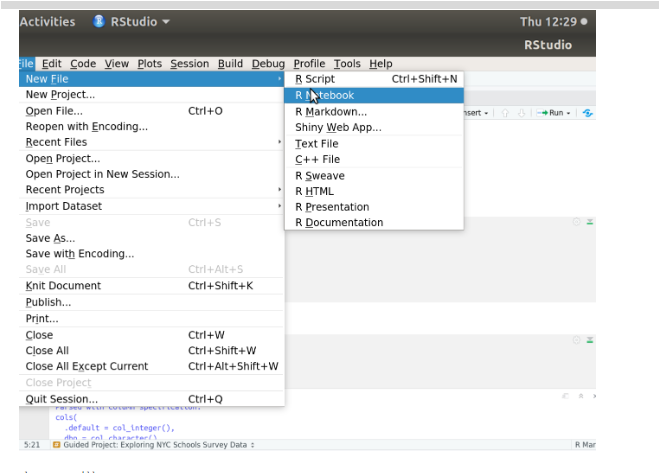

When we open a new notebook, here's what we'll see:

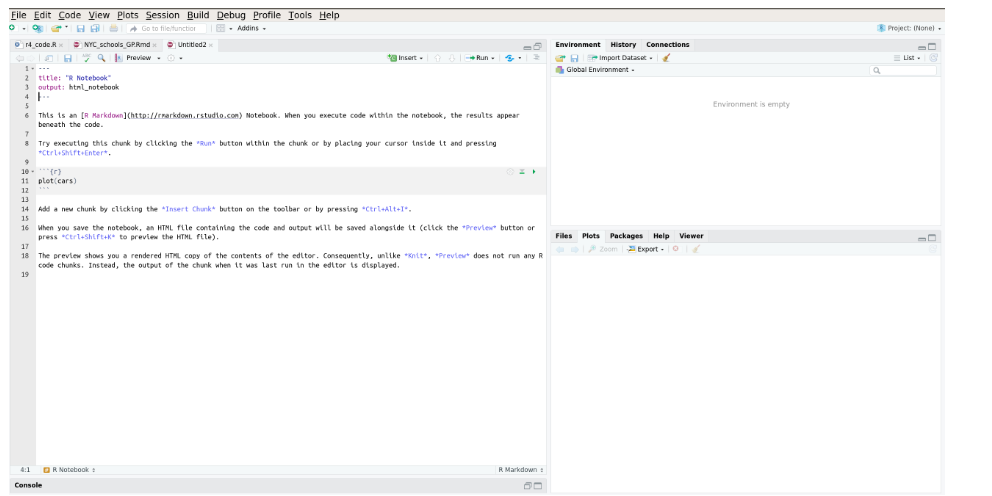

The left panel of the RStudio IDE will consist of a notebook that contains some default formatting and instructions. The top few lines of the notebook specify a default notebook name, and that the output will be an html notebook (while we can specify other formats for our output, we'll stay with html default for now because it will usually provide us with the most versatility).

Make sure we keep the title and output sections, which we can edit to include information like "author" and "date":

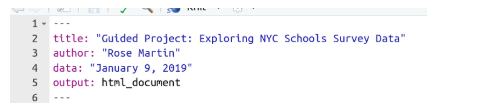

Once we begin working on our notebook, we can delete the instructions beneath the section containing notebook name and output.

In an R notebook, we'll usually write text to describe our analyses interspersed with code blocks, which is where we'll run code. To add a new block, click the Insert Chunk button on the toolbar or press Ctrl+Alt+I (or Cmd+Alt+I for Mac users) . Here's an example of what a typical in-progress notebook looks like:

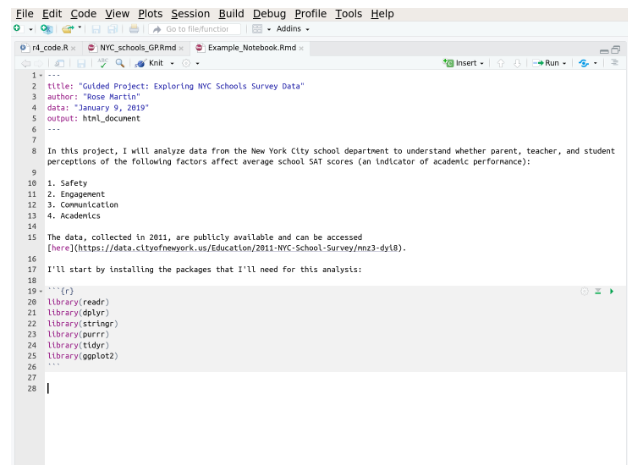

When we type text outside of code blocks in an R Notebook, we're using [R markdown](https://rmarkdown.rstudio.com/), a [lightweight markup language](https://en.wikipedia.org/wiki/Lightweight_markup_language) that can be converted to a variety of output formats. We can simply type paragraphs in plain text, and refer to a [markdown cheat sheet](https://www.markdownguide.org/cheat-sheet/) if we need to add links, create numbered lists, or change font to bold or italics.

Now, try inserting a code block and typing a few lines of code, such as using `library()` to load some packages like `dplyr` and `readr`. We can run our code line by line using Ctrl+Enter (or Cmd+Enter for Mac users) on our keyboard, or we can run all the code in the block using the green arrow in the top left corner of the code block:

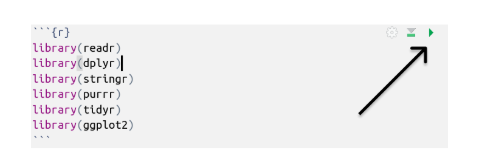

Since code in one block is often dependent on code in blocks above it (say, if we created a new variable and are now calculating summary statistics for it), we can also choose to run the code in a block and all code in previous blocks:

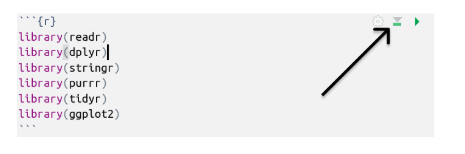

When we save our R notebook (as a `.Rmd` file), an [HTML](https://en.wikipedia.org/wiki/HTML) file containing the code and output (a `.nb.html` file) will be saved alongside it. When we want to see our rendered notebook, go to File -> Knit Document or press Ctrl+Shift+K (Cmd+Shift+K for Macs) to preview the HTML file, which will look something like this:

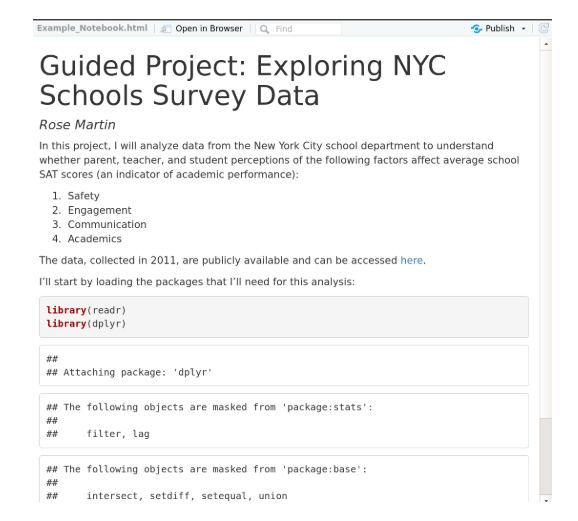

We can open the `.nb.html` file, which contains a rendered copy of our notebook with all current code block outputs, in any web browser. This makes it easy for us to share our work with anyone, even those who don't have R installed on their machine.

### Let's get started on the analysis.

We can refer the solution of this project [here](https://github.com/dataquestio/solutions/blob/master/Mission327Solutions.Rmd)

For the past four file, we've worked on cleaning demographic and test score data from the [New York City Department of Education](https://www.schools.nyc.gov/). We've explored the data using visualization techniques and calculated correlations to understand how schools' demographics affect SAT scores, an indicator of schools' academic performance.

In this project, we'll incorporate some additional data into our analysis: Responses to [surveys](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) designed to gauge parent, student, and teacher perceptions of the quality of New York City schools. In this  project, we'll investigating the following questions:

* Do student, teacher, and parent perceptions of NYC school quality appear to be related to demographic and academic success metrics?

* Do students, teachers, and parents have similar perceptions of NYC school quality?


We can download the data [here](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8). The .zip folder contains five files:

* Survey Data Dictionary.xls
* masterfile11_gened_final.xlsx
* masterfile11_gened_final.txt
* masterfile11_d75_final.xlsx
* masterfile11_d75_final.txt

The first file, `Survey Data Dictionary.xls`, contains metadata that will be useful as we decide how to clean and prepare the survey data for analysis.

The next two files, `masterfile11_gened_final.xlsx` and `masterfile11_gened_final.txt`, contain survey data for "general education" schools — those that do not specifically serve populations with special needs.

The files `masterfile11_d75_final.xlsx` and `masterfile11_d75_final.txt` contain survey data for [District 75](https://www.schools.nyc.gov/special-education/school-settings/district-75) schools, which provide special education support for children with special needs such as learning or physical disabilities.

Why are there duplicate files with different extensions for general education and District 75 schools? The data are presented in formats that can be opened using Microsoft Excel (the `.xlxs` files) and as [unformatted text](https://fileinfo.com/extension/txt) (the `.txt` files). Either format can be imported into R, but we recommend working with the `.txt` files, since we can do so using `readr`. So far, we've used the `read_csv()` function in the `readr` package to import files into R since we've worked with `.csv` (comma separated value) files.

What happens if we try to read the `.txt` files into R using `read_csv()`? We'll get an error message, since values in the `.txt` files are not separated by commas. If we open the file in the text editor, we'll see that the values appear to be separated by tabs.

Consulting the `readr` documentation suggests that `read_tsv()` function, for tab separated values, would be a better choice for importing these data.

Sometimes there's a bit of trial and error involved in figuring out the best function for importing a data file into R. When in doubt, don't hesitate to consult the `readr` documentation and try a few different options.

Now, it's time for us to download the school survey data and the NYC school data we've already cleaned. Import the files into R as dataframes, and use the metadata to make sure we understand the data.

### Instructions

* Download the "combined.csv" file [here](https://data.world/login?next=%2Fdataquest%2Fnyc-schools-data%2Fworkspace%2Ffile%3Ffilename%3Dcombined.csv), import it into R, and save it as a dataframe.

* Download the zip file containing the school survey data and corresponding data dictionary [here](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8).

* Read through the data dictionary, keeping the following questions in mind:

     * Do we have any thoughts on which variables will be important for our analysis?
     * Can any variables be excluded from the analysis?
    * Is there a variable we can use as a key to join the survey data to the `combined` dataset we've already prepared for analysis?
* Import the survey data `.txt` files (`masterfile11_gened_final.txt` and `masterfile11_d75_final.txt`) into R using `read_tsv()` and save them as dataframes.

* Remember to load the packages, like `readr`, that we'll need for our analysis.

* Add text to our R notebook to explain where we downloaded the data from, the packages we've loaded, how we imported the data, and what we learned from the data dictionary.

Now that we've read the data into R and documented the steps we've taken in our R Notebook, take a moment to preview the dataframes. Since we used `readr` functions for import, the dataframes are tibbles, and we can simply type the dataframe names into the console to see the first ten lines.

It's quickly apparent that the dataframes containing survey data are larger than those we've worked with previously (thousands of rows and columns).

Examining the data dictionary indicates that most of the variable columns in these dataframes provide granular information about survey responses. For example, the variable `s_q1a_1` contains, for each school, the number of students (indicated by "s") that responded to "option 1" of "question 1a."

Since we are interested in what we can learn from survey data about perceptions of school quality to study its relationship with SAT scores, we can likely focus our efforts on the aggregate scores for each school calculated from the survey responses.

Here's a screen shot of the descriptions of score variables in the data dictionary:

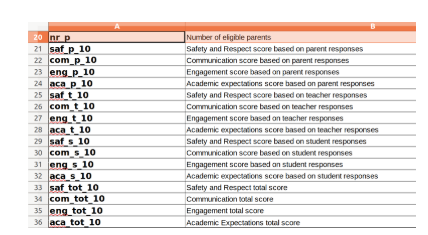

Note that the variables in the data dictionary end with `_10`, whereas the variables in the data table we imported end in `_11`. Presumably, this data dictionary is referring to names of variables from the previous year, 2010. While this is confusing, such metadata discrepancies are a typical challenge for data scientists working with a new dataset.

Let's look back at the variables that seem to contain score values for each school. After a bit of examination, we can see that the variable names refer to schools' scores as determined by different groups' survey responses.

Survey questions assess the following metrics:

* Safety and Respect
* Communication
* Engagement

* Academic Expectations
The following groups responded to the survey:

* Parents
* Teachers
* Students
* Total (The average of parent, teacher, and student scores)

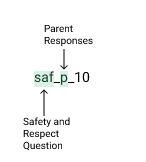

We can greatly simplify the dataframes, and make them easier to work with, by creating new dataframes that contain only variables that contain aggregate scores based on survey results.

In addition to retaining variables with aggregate survey scores, be sure to think about whether any other variables, like `dbn`, may be necessary for future steps in our analysis (like combining survey dataframes with our `combined` dataframe).

Now, let's think about if we need all observations in the dataframes. Take a look at the variables in the survey dataframes. There's a variable called `schooltype` that provides information about whether a school is an elementary school, a high school, or has a special designation.

Can We use that variable to filter the dataframe to retain only observations for high schools? We can filter the general education survey dataframe for observations where `schooltype` has the value "High School", but it looks like the district 75 survey dataframe `schooltype` column contains only the value "District 75 Special Education", which may refer to either high schools or elementary schools.

Now that we've discussed some ways we could simplify the survey dataframes, it's our turn to decide what approaches we'll take. As we perform steps to simplify the dataframe, be sure to explain them and add code blocks as needed in our R Notebook.

### Instructions

* Simplify the survey dataframes to include only variables we will need for our analysis, like `dbn` (so we can use it as a key) and variables that contain aggregate scores (like `saf_p_11` and `com_s_11`).

* When it makes sense to do so, filter the survey dataframes to include only observations for high schools.

* Remember to load any packages, like `dplyr`, that we haven't already loaded and will need for this step.

Now that we've simplified them, working with the survey dataframes probably feels more manageable. When we look at the first ten rows of the dataframe, we're down from thousands of columns to dozens. We can see that the two survey dataframes contain most of the same variables: `dbn`, `bn`, `schoolname`, etc.

Eventually, we'll want to join the survey data to the `combined` dataframe containing NYC school demographic and test score data.

First, though, we can combine the general education and District 75 dataframes. We can use the base R `rbind()` function to combine vectors or matrices by "stacking" them (binding them by rows) as long as they have the same number of columns:

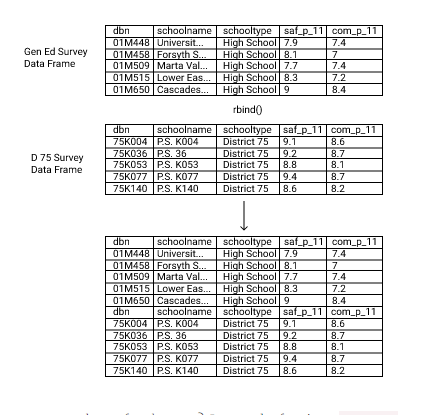

What if the dataframes don't have the same number of columns? Instead of using `rbind()`, we can use the `dplyr` function `bind_rows()`. Since `bind_rows()`, like other `dplyr` functions, is designed for manipulating dataframes, it provides flexibility in situations where dataframes have different numbers of variable columns. When we use `bind_rows()`, the output dataframe will contain a column if that column appears in any of the input dataframes:

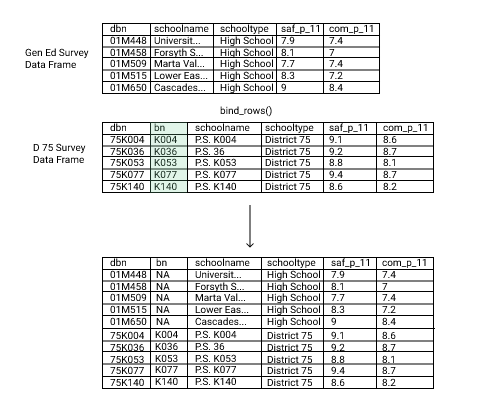

Once we've created a single dataframe containing survey data from all NYC schools, we can join that dataframe to `combined` using `DBN` as a key. When we decide which type of join to use, use the survey data to answer:

* Do student, teacher, and parent perceptions of NYC school quality appear to be related to demographic and academic success metrics?

* Do students, teachers, and parents have similar perceptions of NYC school quality?

If we're interested in relationships of survey data with variables in the `combined` dataframe, it makes sense to join the survey data to `combined` using `left_join()`, which will retain only observations in the survey dataframe that correspond to observations in `combined`.

### Instructions

* Combine the general education and District 75 survey dataframes using the `dplyr` function `bind_rows()`.

* Join the new survey dataframe we created to the `combined` dataframe that contains the NYC schools data we cleaned in this file.

    * Check to make sure that there is a key we can use. Are there any variables we need to rename? Remember that we can use the `rename()` function to do so.
    * Use the type of join that we think is most appropriate based on our suggested questions and any questions we'd like to use the data to answer.
* Remember to add notes to our R notebook to explain our choice of joining functions.

Now that we've created a single, clean dataframe to work with, we can begin our analysis.

Let's think about the first question we suggest we use this data to answer:

* Do student, teacher, and parent perceptions of NYC school quality appear to be related to demographic and academic success metrics?
To get an idea of which demographic and test score variables may be related to parent, teacher, and student perceptions of NYC school quality, we can make a correlation matrix.

Then, we can create scatter plots to examine potentially interesting relationships more closely.

### Instructions

* Create a `correlation matrix` to look for interesting relationships between pairs of variables in the new, combined dataframe we created. Be sure to consider missing values and how we will handle them.

* Remember that one efficient way to identify pairs of variables with correlation coefficients that suggest interesting relationships is to convert the `correlation matrix to a tibble`, select variables, and filter observations.

* Create `scatter plots` to explore potentially interesting relationships between variables in greater detail. Recall that, if we have more than a few scatter plots to make, we can `write a function` to make multiple plots at once.

* What are the `results of our analysis`, and what is `their significance`? Include notes on our analysis and findings in our notebook.

* Don't forget to load any packages we need, like `purrr` and `ggplot2`.

Now we've worked on exploring potential relationships between perspectives of NYC school quality and demographic and academic success metrics. Did we find that scores based on survey responses from parents, students, and teachers displayed different relationships with the same metric? Was this surprising to us?

It would be interesting to see whether parents, students, and teachers have similar perceptions about the four school quality metrics they were surveyed about:

* Safety and Respect
* Communication
* Engagement
* Academic Expectations

There are a few ways that we can answer this question. We may choose to group the data by question and survey response type (parent, student, teacher, or total) and then calculate a summary average for each group. Since visualizations of data are often easier to interpret, perhaps we'll choose to explore differences in scores among groups using `box plots`.

In either case, think about the current format of the dataframe. If we choose to perform this analysis using `tidyverse` package functions like `group_by()` and `summarize()` or `ggplot()`, we will need to reshape the data.

Here's how the columns of our dataframe are currently formatted:

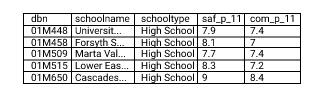

In order to use the metric (safety and respect, communication, engagement, and academic expectations) and response type (student, parent, teacher, total) as grouping factors or to create box plots, we'll need to reshape the data and create some new variables so that the dataframe looks like this:

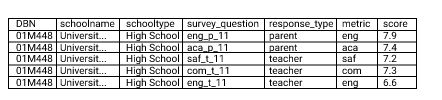

### Instructions

* Use the `tidyr` function `pivot_longer()` to reshape our dataframe so that the survey question (like `saf_p_11` and `com_s_11`) and the score (like `8.7` or `9.0`) are in two separate columns.

    * Remember to load the `tidyr` package if we haven't already.

* Create two new variables similar to these:

    * `response_type`: With the values to indicate "parent," "teacher," "student," or "total"
    * `metric`: With the values to indicate "engagement," "academic expectations," "safety and respect," or "communication"
    * To create the new variables, try using `str_sub()` to extract information from values of the survey question variable (`saf_p_11`, etc)
     * If we want to, we can use `if_else()` to assign more intuitive value names to the variables we created using `str_sub()`, like this:
     
`combined_survey_gather %>%
  mutate(response_type = ifelse(response_type == "_p_", "parent", 
                                ifelse(response_type == "_t_", "teacher", "NA")))`
                                
* Explore differences in parent, teacher, and student perceptions of NYC school quality metrics using summary statistics or creating visualizations like box plots.

* Explain our analysis and findings in our notebook.

We've accomplished a lot as we've worked on this guided project:

* We cleaned and combined fairly large datasets with many variables and confusing metadata.
* We used correlation analysis to highlight potentially interesting relationships between variables and explored them in greater depth using scatter plots.
* We reshaped our dataframe, created new variables, and used them to explore differences among groups' perceptions of NYC school quality.
* Finally, we began working on our first portfolio project using R notebooks.